In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.14.0


## Getting our data ready

In [ ]:
# Check number of data Images
import os
len(os.listdir("/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images"))

5017

In [ ]:
file_path = "/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/list_attribute.txt"
df = pd.read_csv(file_path, skiprows = 1, sep = '\s+')

In [ ]:
df["Male"]

000001.jpg   -1
000002.jpg   -1
000003.jpg    1
000004.jpg   -1
000005.jpg   -1
             ..
202595.jpg   -1
202596.jpg    1
202597.jpg    1
202598.jpg   -1
202599.jpg   -1
Name: Male, Length: 202599, dtype: int64

In [ ]:
# Replace value -1 to 0
df["Male"] = df["Male"].replace(-1,0)

In [ ]:
# Extract one column and create a new DataFrame
df = df[['Male']].copy()  # Replace 'A' with the name of the column you want

# Print the new DataFrame
df

,Male
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,0
202596.jpg,1
202597.jpg,1
202598.jpg,0


In [ ]:
# Cek apakah data di folder "Images" sesuai (Male or Female) dengan value '0' or '1'.
df.iloc[[197]]

,Male
000198.jpg,0


### Access all images in folder "Images" and filter which match only

In [ ]:
# Access and return list of all images
all_images = os.listdir("/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images")

In [ ]:
# using index.isin() to match the images.
matched_images = df.index.isin(all_images)
matched_images

array([False, False, False, ..., False, False, False])

In [ ]:
# using "boolean indexing" to return the orignal data frame which only "True"
df = df[matched_images]

In [ ]:
df

,Male
000051.jpg,1
000052.jpg,1
000065.jpg,1
000166.jpg,1
000198.jpg,0
...,...
202320.jpg,0
202340.jpg,0
202347.jpg,0
202357.jpg,0


In [ ]:
# Create a list from data frame index
id_column = [item for item in df.index]
# Create new column "id" in data frame from list "id_column"
df["id"] = id_column
df

<ipython-input-15-3ac37e4c53e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = id_column


,Male,id
000051.jpg,1,000051.jpg
000052.jpg,1,000052.jpg
000065.jpg,1,000065.jpg
000166.jpg,1,000166.jpg
000198.jpg,0,000198.jpg
...,...,...
202320.jpg,0,202320.jpg
202340.jpg,0,202340.jpg
202347.jpg,0,202347.jpg
202357.jpg,0,202357.jpg


### Reset index

In [ ]:
# Reset index start from 0 to len(df)
df.index = range(len(df))
df

,Male,id
0,1,000051.jpg
1,1,000052.jpg
2,1,000065.jpg
3,1,000166.jpg
4,0,000198.jpg
...,...,...
4995,0,202320.jpg
4996,0,202340.jpg
4997,0,202347.jpg
4998,0,202357.jpg


In [ ]:
# Swap the order of columns id and Male
df = df[['id', 'Male']]  # Specify the columns in the desired order
df

,id,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,0
...,...,...
4995,202320.jpg,0
4996,202340.jpg,0
4997,202347.jpg,0
4998,202357.jpg,0


In [ ]:
# Pengecekan apakah sudah sesuai
df.loc[df["id"] == "000525.jpg"]

,id,Male
14,000525.jpg,0


### Data Ready in data frame

We have 5000 images to use for building our deep learning model.

Male : 2047
Female : 2953


<Axes: >

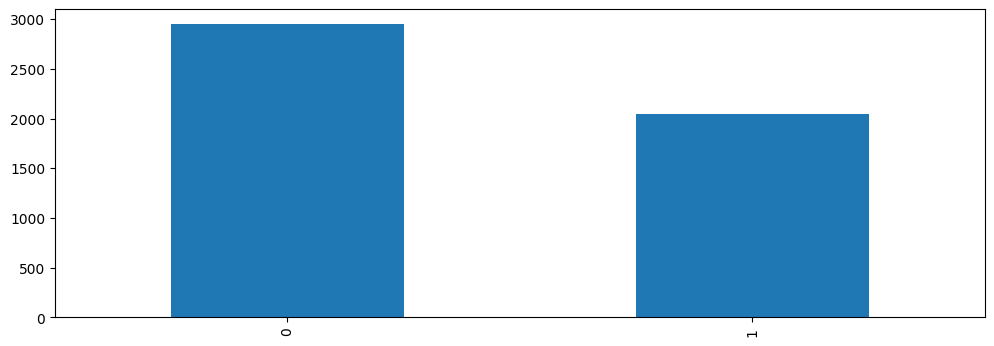

In [ ]:
# How many images are there of each Male or Female?
count_male = (df["Male"] == 1).sum()
count_female = (df["Male"] == 0).sum()
print(f"Male : {count_male}")
print(f"Female : {count_female}")
df["Male"].value_counts().plot.bar(figsize=(12, 4))

## Prepare X and y

In [ ]:
# Take filename from data frame
pathfname = ["/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/" + fname for fname in df["id"]]
pathfname = np.array(pathfname)
print(type(pathfname))
print(len(pathfname))
pathfname[:5]

<class 'numpy.ndarray'>
5000


array(['/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/000051.jpg',
       '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/000052.jpg',
       '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/000065.jpg',
       '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/000166.jpg',
       '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/Dataset/Images/000198.jpg'],
      dtype='<U94')

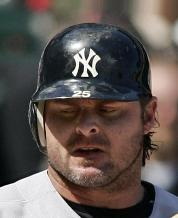

In [ ]:
# Let's view an image
from IPython.display import Image
Image(pathfname[3])

### Split Data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets

X = pathfname  # File paths
y = df['Male'].values  # Labels

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have X_train, y_train, X_val, y_val, X_test, and y_test ready for use in your deep learning model.


In [ ]:
print("Training data - X_train shape:", X_train.shape)
print("Training data - y_train shape:", y_train.shape)
print("Validation data - X_val shape:", X_val.shape)
print("Validation data - y_val shape:", y_val.shape)
print("Test data - X_test shape:", X_test.shape)
print("Test data - y_test shape:", y_test.shape)


Training data - X_train shape: (3500,)
Training data - y_train shape: (3500,)
Validation data - X_val shape: (750,)
Validation data - y_val shape: (750,)
Test data - X_test shape: (750,)
Test data - y_test shape: (750,)


#### Check Class Distribution after Split Data

In [ ]:
import seaborn as sns
from collections import Counter

# Convert your y_train, y_val, and y_test to lists if they are pandas Series
y_train_list = y_train.tolist()
y_val_list = y_val.tolist()
y_test_list = y_test.tolist()

# Count the class distribution
train_class_distribution = Counter(y_train_list)
val_class_distribution = Counter(y_val_list)
test_class_distribution = Counter(y_test_list)

print("Training set class distribution:", train_class_distribution)
print("Validation set class distribution:", val_class_distribution)
print("Test set class distribution:", test_class_distribution)

Training set class distribution: Counter({0: 2067, 1: 1433})
Validation set class distribution: Counter({0: 450, 1: 300})
Test set class distribution: Counter({0: 436, 1: 314})


#### Image Preprocessing Functions:

Some pre-trained models may require specific preprocessing functions.

 For example, if you're using a ResNet model from a deep learning framework like PyTorch or TensorFlow, there are built-in functions to preprocess images as required by the model.

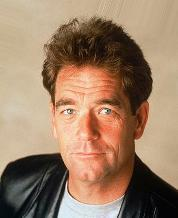

In [ ]:
from PIL import Image

image = Image.open(X[1])
image


In [ ]:
# import torch
# import torchvision.transforms as transforms

# # Define the transformations for preprocessing
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to the model's input size
#     transforms.ToTensor(),           # Convert to PyTorch tensor
#     transforms.Normalize(
#         mean=[0.485, 0.456, 0.406],  # Mean values for ImageNet
#         std=[0.229, 0.224, 0.225]    # Standard deviation for ImageNet
#     )
# ])

In [ ]:
# # Preprocess an image using the defined transformation
# def preprocess_image(image_path):
#     image = Image.open(image_path)
#     image = preprocess(image)
#     return image

In [ ]:
# # Preprocess the training, validation, and test data
# X_train_preprocessed = [preprocess_image(image_path) for image_path in X_train]
# X_val_preprocessed = [preprocess_image(image_path) for image_path in X_val]
# X_test_preprocessed = [preprocess_image(image_path) for image_path in X_test]

##### Save the Preprocessed Data

In [ ]:
# # Define the directory path in your Google Drive
# google_drive_path = "/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/preprocessed data/"

# # Save the preprocessed data to your Google Drive
# np.save(google_drive_path + "X_train_preprocessed.npy", np.array(X_train_preprocessed))
# np.save(google_drive_path + "X_val_preprocessed.npy", np.array(X_val_preprocessed))
# np.save(google_drive_path + "X_test_preprocessed.npy", np.array(X_test_preprocessed))
# np.save(google_drive_path + "y_train.npy", y_train)
# np.save(google_drive_path + "y_val.npy", y_val)
# np.save(google_drive_path + "y_test.npy", y_test)


##### Loading the Preprocessed Data

By setting allow_pickle=True, you allow NumPy to load object arrays that may have been saved with custom or complex data types. This should resolve the issue you're facing when loading your data.

In [ ]:
# Define the directory path in your Google Drive
google_drive_path = "/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/preprocessed data/"

# Load the preprocessed data
X_train_preprocessed = np.load(google_drive_path + "X_train_preprocessed.npy", allow_pickle=True)
X_val_preprocessed = np.load(google_drive_path + "X_val_preprocessed.npy", allow_pickle=True)
X_test_preprocessed = np.load(google_drive_path + "X_test_preprocessed.npy", allow_pickle=True)
y_train = np.load(google_drive_path + "y_train.npy", allow_pickle=True)
y_val = np.load(google_drive_path + "y_val.npy", allow_pickle=True)
y_test = np.load(google_drive_path + "y_test.npy", allow_pickle=True)


#### Loading a Pre-trained ResNet Model

In [ ]:
import torch
import torchvision.models as models

In [ ]:

# # Load a pre-trained ResNet model (e.g., ResNet-50)
# model = models.resnet50(pretrained=True)

# # Modify the final fully connected layer for binary classification
# num_features = model.fc.in_features
# model.fc = torch.nn.Linear(num_features, 2)  # Assuming 2 classes for binary classification

# # Print the modified model architecture
# print(model)


In [ ]:
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader, Dataset
# import torch.nn as nn
# import torch.optim as optim

# # Define loss function, and optimizer

# loss_function = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

##### Fine-tuning the Model

Fine-tuning involves modifying the pre-trained ResNet model to adapt it for your specific binary classification task and then training it on your preprocessed data.

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim

# Define a custom dataset class
# a custom dataset class to load and preprocess your data, allowing you to feed it to the model during training.
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Set up data loaders to efficiently load and batch your training and validation data.
train_dataset = CustomDataset(X_train_preprocessed, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(X_val_preprocessed, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
# import matplotlib.pyplot as plt

# # Lists to store accuracy and loss values
# train_accuracy_values = []
# val_accuracy_values = []
# train_loss_values = []
# val_loss_values = []

# # Training loop
# num_epochs = 30
# for epoch in range(num_epochs):
#     model.train()
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)

#         # Create one-hot encoded labels
#         one_hot_labels = torch.zeros(labels.size(0), 2)
#         one_hot_labels[range(labels.size(0)), labels] = 1  # Assuming labels are 0 (not male) and 1 (male)

#         loss = loss_function(outputs, one_hot_labels)
#         loss.backward()
#         optimizer.step()

#     # Validation loop
#     model.eval()
#     total_correct = 0
#     total_samples = 0
#     total_loss = 0.0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             total_samples += labels.size(0)
#             total_correct += (predicted == labels).sum().item()

#             # Calculate validation loss
#             one_hot_labels = torch.zeros(labels.size(0), 2)
#             one_hot_labels[range(labels.size(0)), labels] = 1
#             val_loss = loss_function(outputs, one_hot_labels)
#             total_loss += val_loss.item()

#     # Calculate accuracy and loss values
#     accuracy = total_correct / total_samples
#     avg_val_loss = total_loss / len(val_loader)

#     train_accuracy_values.append(accuracy)
#     val_accuracy_values.append(accuracy)
#     train_loss_values.append(loss.item())
#     val_loss_values.append(avg_val_loss)

#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Validation Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# # Plot accuracy and loss curves
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(train_accuracy_values, label='Training Accuracy')
# plt.plot(val_accuracy_values, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(train_loss_values, label='Training Loss')
# plt.plot(val_loss_values, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

##### Save the Trained model

In [ ]:
# # Save the trained model to a specific directory in your Google Drive
# save_path = '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/saved model/trained_model.pth'
# torch.save(model.state_dict(), save_path)


##### Loading the Trained Model

In [ ]:
# Specify the path to the saved model in your Google Drive
load_path = '/content/drive/MyDrive/Indonesia AI Computer Vision/Face Recognition/saved model/trained_model.pth'

# Load the saved model
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# Ensure the same architecture

# Load the saved model's state dictionary from the specified path
model.load_state_dict(torch.load(load_path))

# Set the model in evaluation mode
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### Classification Report on Validation set

In [ ]:
from sklearn.metrics import classification_report

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Validation loop with recording true and predicted labels
model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


Validation Accuracy: 96.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       450
           1       0.95      0.95      0.95       300

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



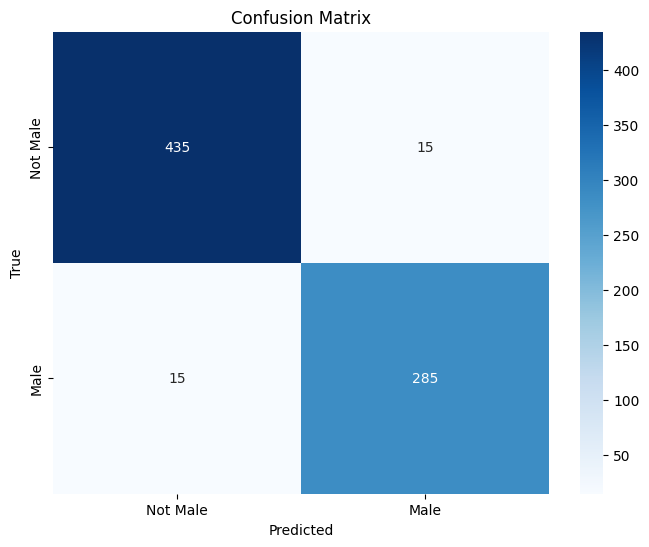

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Male', 'Male'], yticklabels=['Not Male', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


##### Classification Report on Test set

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have loaded and preprocessed your test data as X_test_preprocessed and y_test
# Just like Train and validation

# Create a DataLoader for the test data
test_data = CustomDataset(X_test_preprocessed, y_test)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Set the model to evaluation mode
model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


Test Accuracy: 95.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       436
           1       0.95      0.95      0.95       314

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



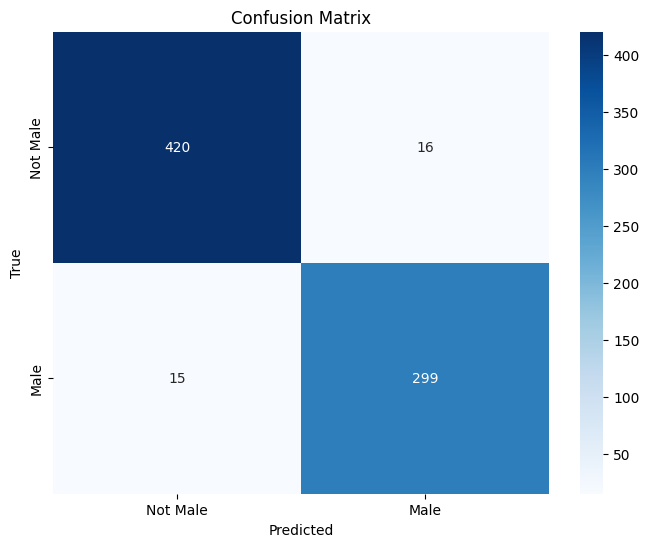

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Male', 'Male'], yticklabels=['Not Male', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()